In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.datasets import cifar10
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.


In [63]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = cifar10.load_data()

In [9]:
print(x_train.shape) #(50000, 32, 32, 3)
print(x_test.shape) 
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


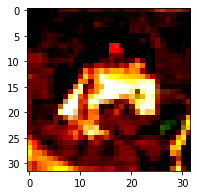

In [70]:
from matplotlib import pyplot as plt
plt.figure(figsize=(3,3))
plt.imshow(x_train[0]) 

In [4]:
## Normalize Data
def normalize(X_train,X_test):
        mean = np.mean(X_train,axis=(0,1,2,3))
        std = np.std(X_train, axis=(0, 1, 2, 3))
        X_train = (X_train-mean)/(std+1e-7)
        X_test = (X_test-mean)/(std+1e-7) 
        return X_train, X_test,mean,std
    
    
## Normalize Training and Testset    
x_train, x_test,mean_train,std_train = normalize(x_train_org, x_test_org) 

In [31]:
one_hot=OneHotEncoder()
y_train=one_hot.fit_transform(y_train_org).toarray()
y_test=one_hot.transform(y_test_org).toarray()

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [47]:
classifier=Sequential()

In [48]:
classifier.add(Convolution2D(filters=32, kernel_size=(3,3) , input_shape=(32,32,3), activation='relu'))
classifier.add(BatchNormalization())

In [49]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [50]:
classifier.add(Convolution2D(filters=32, kernel_size=(3,3) , input_shape=(32,32,3), activation='relu'))
classifier.add(BatchNormalization())

In [51]:
classifier.add(Flatten())

In [52]:
classifier.add(Dense(100, activation='relu'))

In [53]:
classifier.add(Dense(output_dim=10,activation='softmax'))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  """Entry point for launching an IPython kernel.


In [54]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
batch_normalization_4 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)              

In [55]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
classifier.fit(x_train,y_train,batch_size=100,epochs=5)

Epoch 1/5
50000/50000 [==============================] - 72s 1ms/step - loss: 1.3175 - accuracy: 0.5563
Epoch 2/5
50000/50000 [==============================] - 72s 1ms/step - loss: 0.8017 - accuracy: 0.7202
Epoch 3/5
50000/50000 [==============================] - 72s 1ms/step - loss: 0.5755 - accuracy: 0.7992
Epoch 4/5
50000/50000 [==============================] - 72s 1ms/step - loss: 0.4034 - accuracy: 0.8602
Epoch 5/5
50000/50000 [==============================] - 72s 1ms/step - loss: 0.2773 - accuracy: 0.9055


In [61]:
input_example=(np.zeros(shape=(1,32,32,3))-mean_train)/(std_train+1e-7) 
classifier.predict(input_example)

array([[9.99875716e-04, 1.25229871e-09, 6.52272105e-01, 1.08258456e-01,
        2.33154625e-01, 6.92115937e-05, 7.52062537e-04, 3.61387210e-04,
        4.13224567e-03, 5.39122418e-08]], dtype=float32)

In [62]:
classifier.predict(x_test[0:1])

array([[4.6357822e-05, 1.9632731e-07, 7.0249639e-04, 9.4973880e-01,
        3.6217464e-06, 4.9134169e-02, 3.4132474e-05, 2.9009734e-05,
        3.1027046e-04, 9.7370025e-07]], dtype=float32)